<a href="https://colab.research.google.com/github/gigihsantoso/Smoke-Detection/blob/main/Neuron_Network_Smoke_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
!wget https://github.com/gigihsantoso/Smoke-Detection/blob/main/smoke_detection_iot.csv.zip?raw=true \
    -O /tmp/smoke_detection_iot.csv.zip

--2022-09-06 07:47:00--  https://github.com/gigihsantoso/Smoke-Detection/blob/main/smoke_detection_iot.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/gigihsantoso/Smoke-Detection/raw/main/smoke_detection_iot.csv.zip [following]
--2022-09-06 07:47:00--  https://github.com/gigihsantoso/Smoke-Detection/raw/main/smoke_detection_iot.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gigihsantoso/Smoke-Detection/main/smoke_detection_iot.csv.zip [following]
--2022-09-06 07:47:01--  https://raw.githubusercontent.com/gigihsantoso/Smoke-Detection/main/smoke_detection_iot.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent

##Setup

In [163]:
import pathlib
import tensorflow as tf
import zipfile
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive, files, data_table
from sklearn.metrics import confusion_matrix

## Load Data

In [164]:
data_url = "/tmp/smoke_detection_iot.csv.zip"
data_dir = zipfile.ZipFile(data_url, 'r')
data_dir.extractall("MyFile")
data_dir.close()

In [165]:
data=pd.read_csv('MyFile/smoke_detection_iot.csv', delimiter=",")

##Data Explorer

In [166]:
data_analyst = data.copy()

In [167]:
data_analyst

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [168]:
print(f"jumlah data adalah {len(data_analyst)}")

jumlah data adalah 62630


In [169]:
data_0 = len(data_analyst.loc[data_analyst['Fire Alarm'].eq(0)])
data_1 = len(data_analyst.loc[data_analyst['Fire Alarm'].eq(1)])
print(f"jumlah data dengan klasifikasi 0 adalah {data_0}, 1 adalah {data_1}")

jumlah data dengan klasifikasi 0 adalah 17873, 1 adalah 44757


In [170]:
desc = data_analyst.drop(columns=["Fire Alarm", 'Unnamed: 0']).describe()
desc

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000


In [171]:
data_analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


## Helper

In [172]:
def dataframe_split(data, ratio= 0.2, shuffle= 0):
  len_ = int(len(data) - (ratio*len(data)))
  if shuffle == 0 :
    part_  = data.iloc[:int(1 + len_)]
    rest_part_ = data.drop(part_.index)
  elif shuffle == 1:
    part_ = data.sample(frac = 1.0 - ratio)
    rest_part_ = data.drop(part_.index)
  return (part_, rest_part_)

In [173]:
def cast_type(x: tf.Tensor):
  return tf.cast(x, tf.float64)

In [174]:
def dataframe_to_dataset(data, batch_size=32):
  df = data.copy()
  labels = df.pop('Fire Alarm')
  df = {key:  tf.expand_dims(value,axis=1) for key, value in df.items()}
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  # ds = ds.map(lambda x,  y: (tf.py_function(func=cast_type, inp=[x], Tout=tf.float64), y ))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [175]:
def normalization(name, dataset):
  feature_dataset = dataset.map(lambda x,y: x[name])
  layer = tf.keras.layers.Normalization()
  layer.adapt(feature_dataset)

  return layer

In [176]:
def plot_metric(x, y, history, metric):
  fig, ax = plt.subplots(x, y, figsize=(15,10))
  epochs = range(len(history.history[metric[0]]))
  for metric, ax in zip(metric, ax.flatten()):
    ax.plot(epochs, history.history[metric], 'r', label='train')
    ax.plot(epochs, history.history['val_'+metric], 'b', ls="--", label='val')
    ax.set_ylabel(metric)
    ax.set_xlabel('epoch')
    ax.legend()  
  plt.show()

In [177]:
def plot_confution_matrix(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Tidak Berlangganan dengan Prediksi yang tepat (True Negatives): ', cm[0][0])
  print('Tidak Berlangganan dengan Prediksi yang salah (False Positives): ', cm[0][1])
  print('Berlangganan dengan Prediksi yang salah (False Negatives): ', cm[1][0])
  print('Berlangganan dengan Prediksi yang tepat (True Positives): ', cm[1][1])
  print('Total: ', np.sum(cm[1]))

##Data Preprocessing

In [178]:
data_pre = data.copy()
data_pre.drop(columns=['Unnamed: 0'], inplace=True)

In [179]:
train, other = dataframe_split(data_pre, ratio= 0.2, shuffle=1)
val, test = dataframe_split(other, ratio= 0.2, shuffle=1)

In [180]:
print(len(train), 'training examples')
print(len(val), 'validation examples')
print(len(test), 'validation examples')

50104 training examples
10021 validation examples
2505 validation examples


In [181]:
batch_size = 128

train_ds = dataframe_to_dataset(train, batch_size=batch_size)
val_ds = dataframe_to_dataset(val, batch_size=batch_size)
test_ds = dataframe_to_dataset(test, batch_size=batch_size)

In [182]:
all_inputs = []
all_preprocessors = []

In [183]:
for data in data_pre.drop(columns=['Fire Alarm']).columns:
  input = tf.keras.Input(shape=(1,), name=data, dtype="float64")
  num_layer = normalization(name=data, dataset=train_ds)
  num_preprocessor = num_layer(input)
  all_inputs.append(input)
  all_preprocessors.append(num_preprocessor)

In [184]:
all_inputs, all_preprocessors

([<KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'UTC')>,
  <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'Temperature[C]')>,
  <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'Humidity[%]')>,
  <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'TVOC[ppb]')>,
  <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'eCO2[ppm]')>,
  <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'Raw H2')>,
  <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'Raw Ethanol')>,
  <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'Pressure[hPa]')>,
  <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'PM1.0')>,
  <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'PM2.5')>,
  <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'NC0.5')>,
  <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'NC1.0')>,
  <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 

## Model

In [185]:
all_features = tf.keras.layers.concatenate(all_preprocessors)
x = tf.keras.layers.Dense(16, activation=tf.keras.activations.relu, kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.L2(0.0001))(all_features)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(16, activation=tf.keras.activations.relu, kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.L2(0.0001))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(16, activation=tf.keras.activations.relu, kernel_initializer='random_normal', kernel_regularizer=tf.keras.regularizers.L2(0.0001))(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)(x)

model = tf.keras.Model(all_inputs, output)

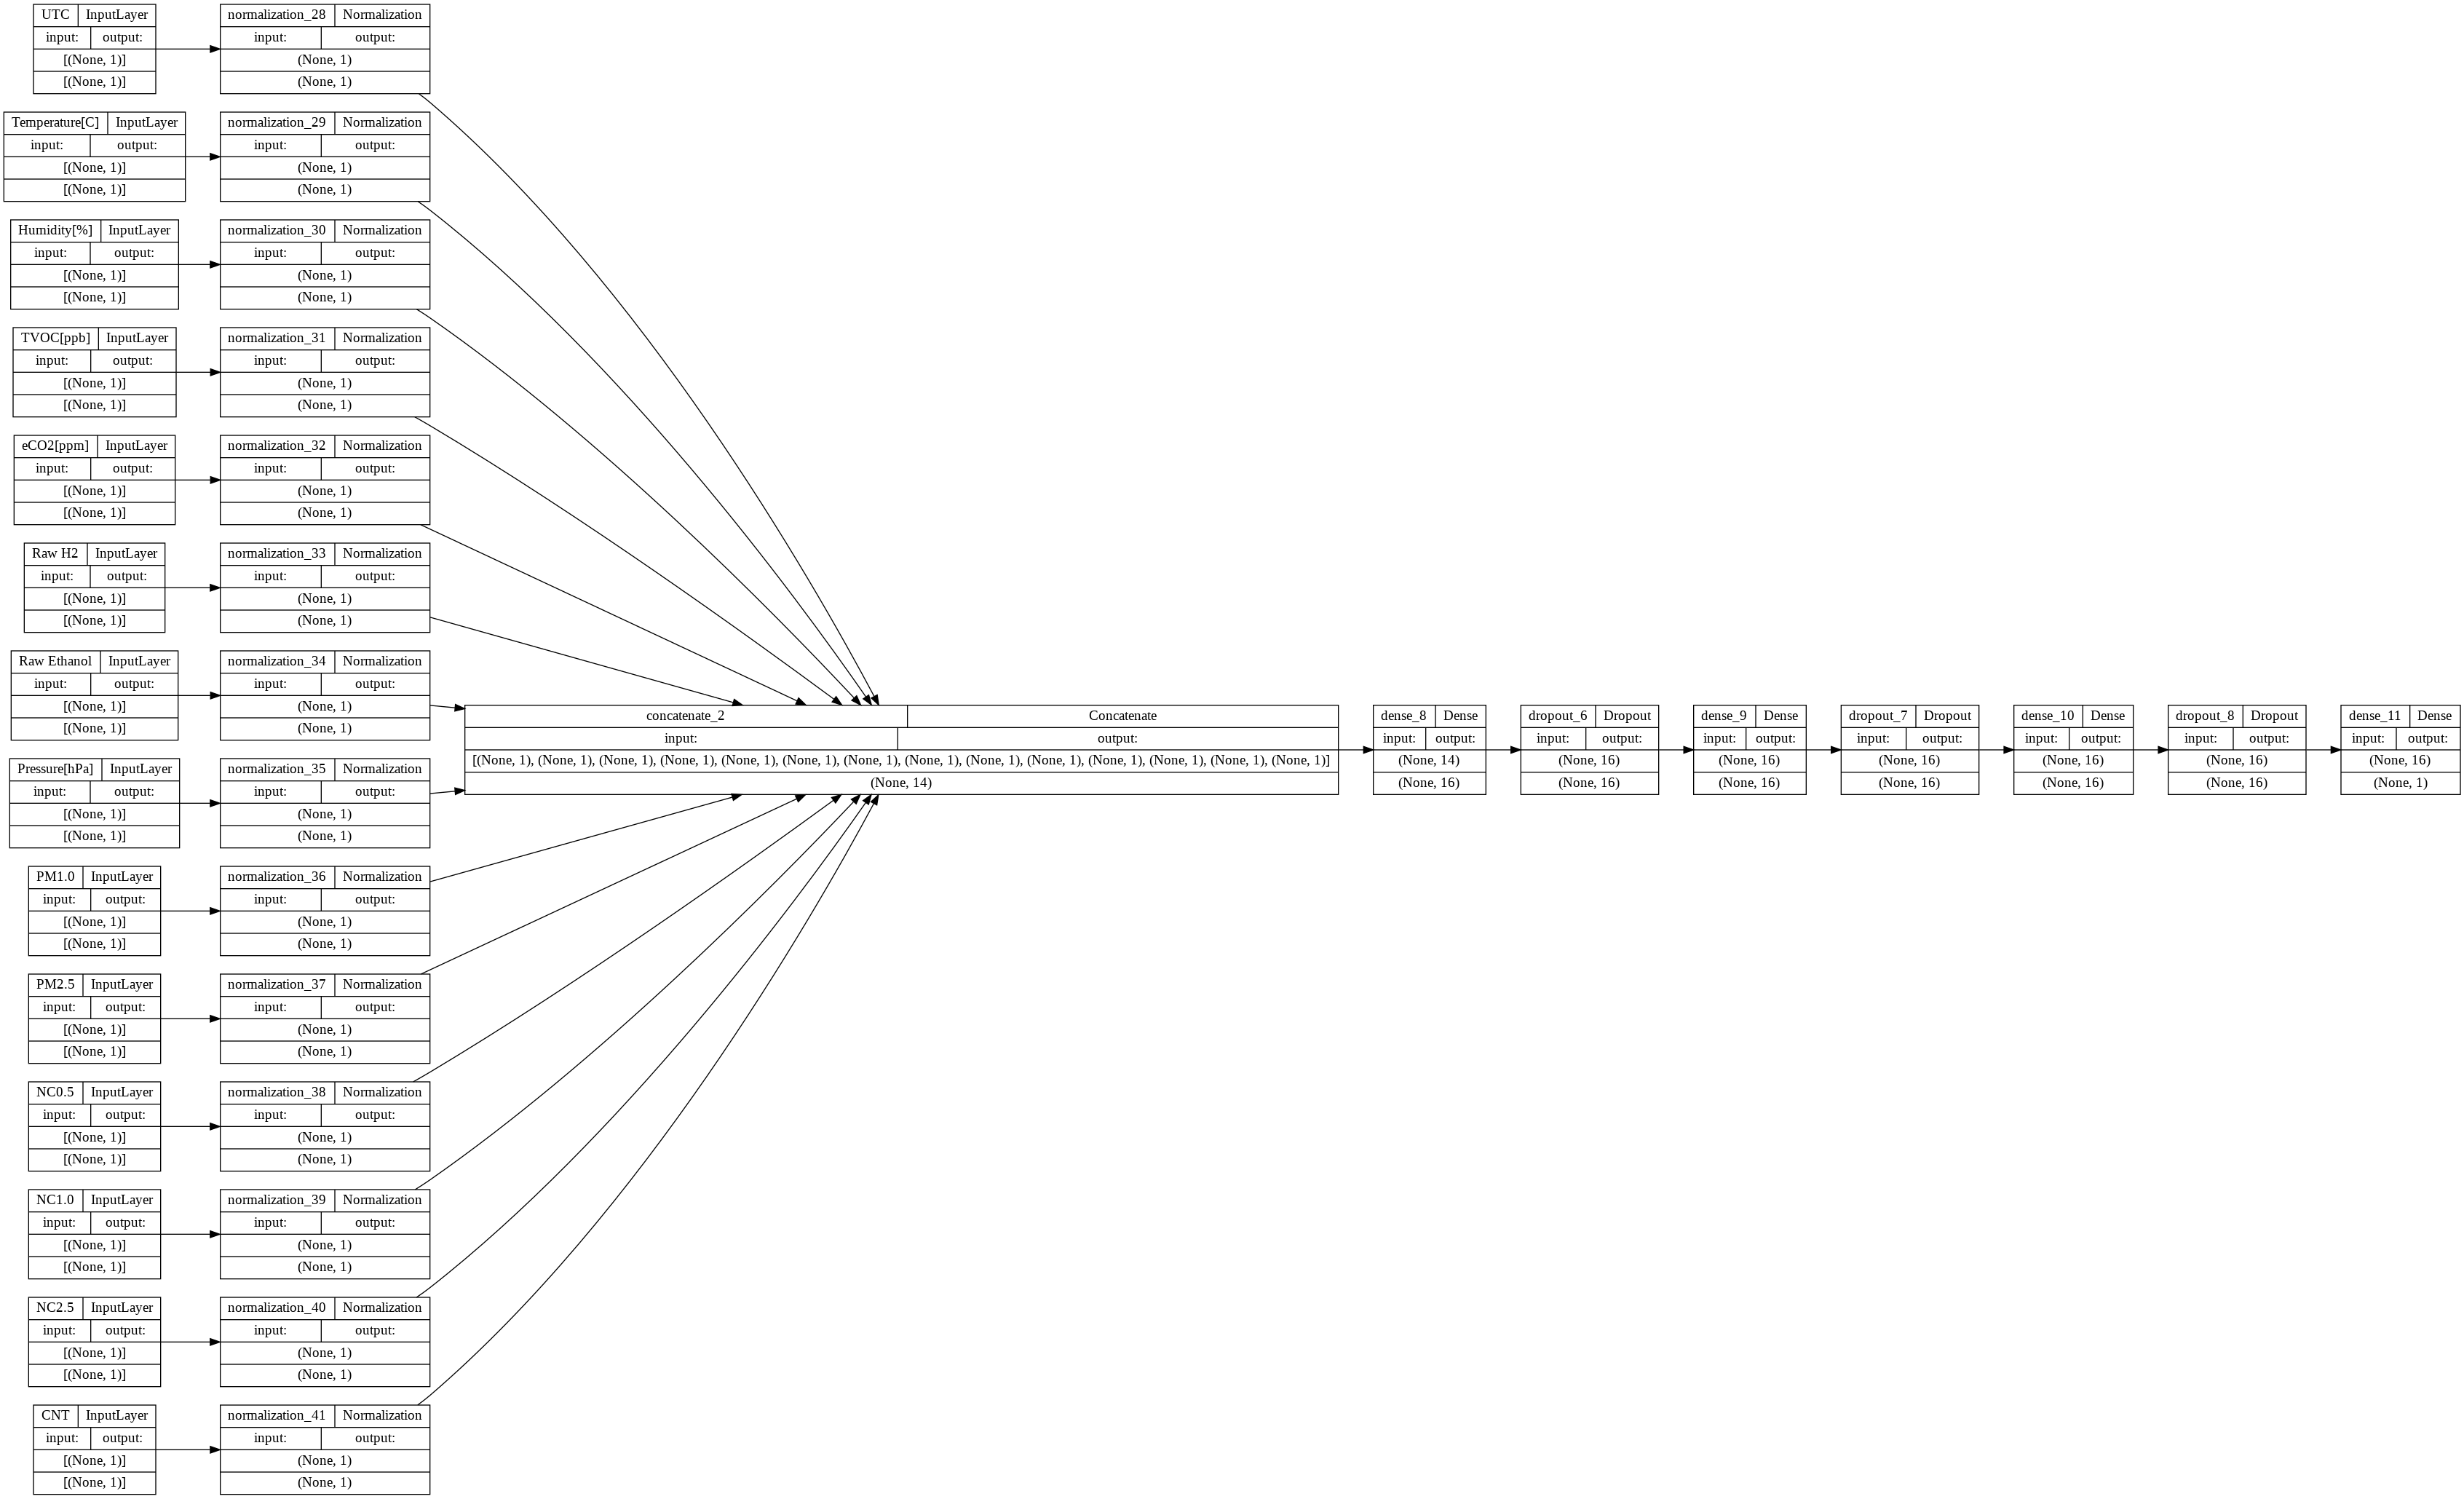

In [186]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [187]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.SensitivityAtSpecificity(0.5, name='specificity')
]
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

In [188]:
loss = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
val_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
history = model.fit(train_ds, epochs=100, validation_data=val_ds, callbacks=[loss, val_loss])

Epoch 1/100
392/392 [==============================] - 5s 7ms/step - loss: 0.2121 - tp: 35055.0000 - fp: 2522.0000 - tn: 11709.0000 - fn: 818.0000 - accuracy: 0.9333 - precision: 0.9329 - recall: 0.9772 - specificity: 0.9993 - val_loss: 0.0183 - val_tp: 7103.0000 - val_fp: 25.0000 - val_tn: 2893.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9975 - val_precision: 0.9965 - val_recall: 1.0000 - val_specificity: 1.0000
Epoch 2/100
392/392 [==============================] - 1s 3ms/step - loss: 0.0251 - tp: 35711.0000 - fp: 153.0000 - tn: 14078.0000 - fn: 162.0000 - accuracy: 0.9937 - precision: 0.9957 - recall: 0.9955 - specificity: 0.9999 - val_loss: 0.0080 - val_tp: 7103.0000 - val_fp: 2.0000 - val_tn: 2916.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9998 - val_precision: 0.9997 - val_recall: 1.0000 - val_specificity: 1.0000
Epoch 3/100
392/392 [==============================] - 2s 4ms/step - loss: 0.0173 - tp: 35791.0000 - fp: 89.0000 - tn: 14142.0000 - fn: 82.0000 - accuracy: 0.9966 - pre

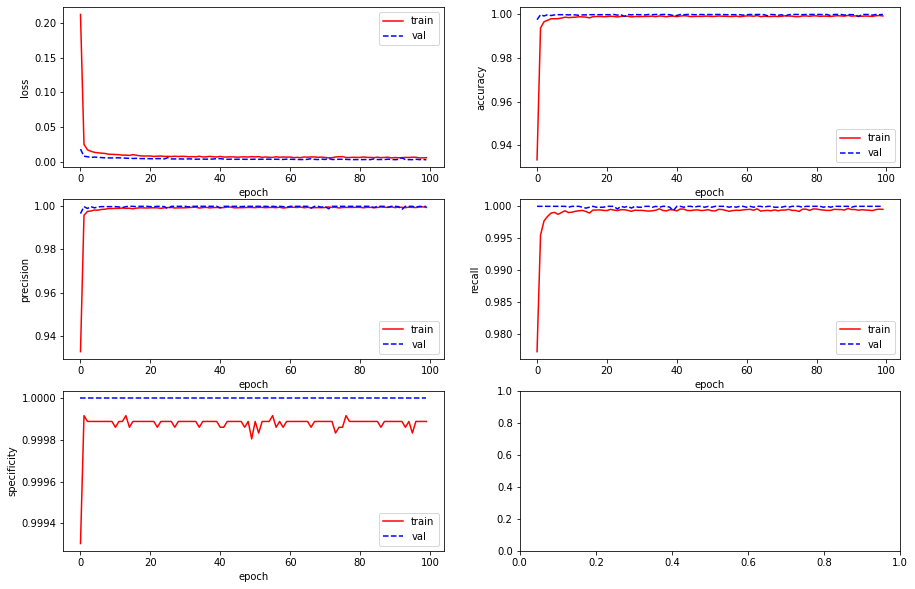

In [189]:
metric = ['loss', 'accuracy', 'precision', 'recall', 'specificity']
plot_metric(3,2, history, metric)

## Evaluate

In [190]:
predict_test = model.predict(test_ds)
test_ds_unbach = test_ds.unbatch()
label_test = [i[1] for i in list(test_ds_unbach.as_numpy_iterator())]

20/20 [==============================] - 0s 2ms/step - loss: 0.0026 - tp: 1781.0000 - fp: 0.0000e+00 - tn: 724.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - specificity: 1.0000
loss :  0.002638713689520955
tp :  1781.0
fp :  0.0
tn :  724.0
fn :  0.0
accuracy :  1.0
precision :  1.0
recall :  1.0
specificity :  1.0
Tidak Berlangganan dengan Prediksi yang tepat (True Negatives):  724
Tidak Berlangganan dengan Prediksi yang salah (False Positives):  0
Berlangganan dengan Prediksi yang salah (False Negatives):  0
Berlangganan dengan Prediksi yang tepat (True Positives):  1781
Total:  1781


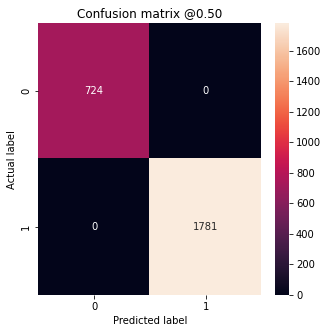

In [191]:
model_evaluate = model.evaluate(test_ds)
for name_metric, value_evaluate in zip(model.metrics_names, model_evaluate):
  print(name_metric, ': ', value_evaluate)

plot_confution_matrix(label_test, predict_test)